In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy

In [2]:
pip install scipy

Note: you may need to restart the kernel to use updated packages.


### Recap : Linear algebra in action 

In [3]:
Features (ML) = Columns
object has a set ok features : (height, width, green color intensity)
Categories to identify (in our smart camera system) :
Category 1 - Deciduous tree (trees that lose levase in fall, like oak, maple)
Category 2 - Evergreen tree (trees that stay green years-round- like pine, spruce)
Category 3 - Bush (short, bushy plants - like scrubs, hedges)
Category 4 - Not a plant (wall, pole, bulding, etc.)

SyntaxError: cannot assign to function call here. Maybe you meant '==' instead of '='? (3889712231.py, line 1)

In [4]:
objects = np.array([
    [8.5, 3.2, 85],
    [10.2, 4.1, 78],
    [3., 2.5, 12.],
    [2.8, 2.3, 8],
    [9.1, 3.8, 81],
])

# features (columns) : (height, width, green color intensity)
objects

array([[ 8.5,  3.2, 85. ],
       [10.2,  4.1, 78. ],
       [ 3. ,  2.5, 12. ],
       [ 2.8,  2.3,  8. ],
       [ 9.1,  3.8, 81. ]])

In [5]:
objects.shape

(5, 3)

In [ ]:
#Weights - its an array/matrix.vector that we apply
#on th input (a row of tje objects matrix) to get a prediction (the category of the object)

In [ ]:
Use Matrix Multiplication : 
    objects @ weights =  prediction

In [6]:
# the waigths/coefficient matrix ( to aplly on objects), 
#the shape is ( number of categories, number of features) 
# (4, 3)
weights = np.array([
    #cat1 cat2  cat3 cat4
    [1.0, 1.2, 0.6, 0.3], #feature 1 - 
    [0.8, 0.5, 0.7, 0.9], #feature 2 - 
    [2. , 1.8, 1.5, 0.1], #feature 3 -  
])
weights

array([[1. , 1.2, 0.6, 0.3],
       [0.8, 0.5, 0.7, 0.9],
       [2. , 1.8, 1.5, 0.1]])

In [7]:
scores = objects @ weights # prediction scores : (6, 4) - (objects, category score)
scores

array([[181.06, 164.8 , 134.84,  13.93],
       [169.48, 154.69, 125.99,  14.55],
       [ 29.  ,  26.45,  21.55,   4.35],
       [ 20.64,  18.91,  15.29,   3.71],
       [174.14, 158.62, 129.62,  14.25]])

In [8]:
np.argmax(scores, axis=1)

array([0, 0, 0, 0, 0])

In [ ]:
#Measuer the confidence on our results
#Test if the scores are real/random
#Quantify uncertainty

In [9]:
population = All of the tips ever given in human history
sample = 244 restaurant tips

SyntaxError: invalid syntax (1055669120.py, line 1)

In [10]:
object1_scores = scores[0]
object1_scores

array([181.06, 164.8 , 134.84,  13.93])

In [11]:
np.mean(object1_scores)


np.float64(123.65750000000001)

In [12]:
np.std(object1_scores, ddof=1)

np.float64(75.61508860670601)

### SciPy -  
#used for advenced statistical test (t-test, ANOVA, chi square)
#probability distributions (normal, binomial, poisson, etc..)
#statistical mode (regression analysis)
#Optimization, integrations, signal processing

Numpy provide:
- Array and basis operations
- Basis statistics : mean, median, std, percentiles
Numpy "what IS the data?" (descriptive
Scipy "waht I can CONCLUDE form the data"

In [13]:
tips_df = sns.load_dataset("tips")
tips_df.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [14]:
tip_amount = tips_df["tip"].values
tip_amount[:5]

array([1.01, 1.66, 3.5 , 3.31, 3.61])

In [15]:
describe = scipy.stats.describe(tip_amount)

In [17]:
describe.minmax

(np.float64(1.0), np.float64(10.0))

In [18]:
describe.variance

np.float64(1.9144546380624712)

In [20]:
describe.skewness #measure of asymmetry

np.float64(1.4564266884221506)

In [21]:
describe.kurtosis #mesure tail heaviness , the values are the mean

np.float64(3.5495519893455114)

<Axes: ylabel='Count'>

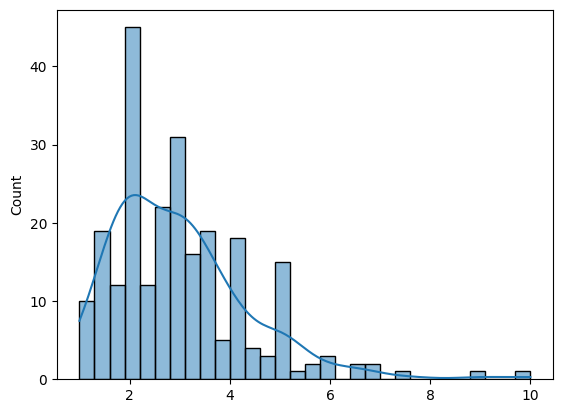

In [22]:
sns.histplot (tip_amount, bins=30, kde=True)

### Understanding Data Distributions

In [ ]:
What is "Spread" or "Variability"

In [ ]:
DATASET_A = [50, 51, 50, 49, 50] -> All are close to 50
DATASET_B = [20, 40, 50, 60, 80] -> Valies spread far from 50

In [ ]:
Standard deviation (std) tell us is how far values typically are from the mean

In [25]:
mean = describe.mean

In [26]:
std = np.std(tip_amount)

In [ ]:
typical range of the values in data is going to be : 
(mean - std) to (mean + std)

In [29]:
print(f"{(mean - std)} to {(mean + std)}")

1.6174787346946944 to 4.379078642354485


In [ ]:
Mean = $ 3.0
std = $ 1.0

Most tips : 2.0 ans 4.0 (whithin the 1st std)
$1.0 and $5.0 (within 2 std)
$0.0 and $6.0 (within 3 std)

In [ ]:
Small std - values are clustered tightly (consistency)
Large stp - Values spread widely (inconsistent)

ValueError: '---' is not a valid value for ls; supported values are '-', '--', '-.', ':', 'None', ' ', '', 'solid', 'dashed', 'dashdot', 'dotted'

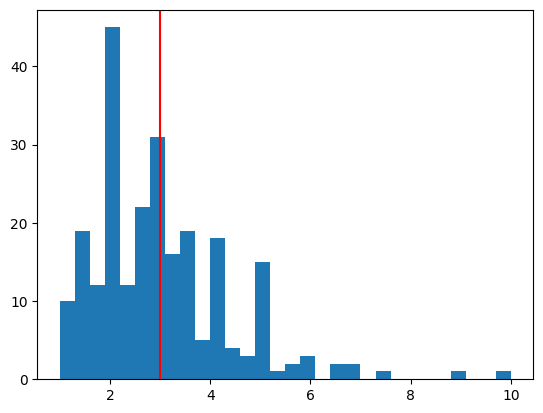

In [31]:
plt.hist(tip_amount, bins=30)

plt.axvline(mean, color='red')
plt.axvline(mean + std, color='orange', linestyle="---")
plt.axvline(mean - std, color='orange', linestyle="---")

plt.axvline(mean + 2*std, color='yellow', linestyle="---")
plt.axvline(mean - 2*std, color='yellow', linestyle="---")

plt.axvline(mean + 3*std, color='green', linestyle="---")
plt.axvline(mean - 3*std, color='green', linestyle="---")


In [33]:
#exercise :  count the tips within 1st std
lower_1std = tip_amount > mean - std
high_1std = tip_amount < mean + std

first_std_map = (lower_1std) & (high_1std)
sum(first_std_map)

np.int64(182)

In [34]:
tip_amount.size

244

In [ ]:
Exercise :
1.use scipy.stats.describe() on the total_bill column from the tips dataset.Interpret the skewness value.
2.
    data = [12, 15, 13, 12, 18, 20, 22, 21]
    1.use describe to get all statistics
    2. print the mean, median, varianc, stp, skewness
    3.interpret thse skewness :  is the data symetric , left skewed or right skewed


In [37]:
data = [12, 15, 13, 12, 18, 20, 22, 21]
data

[12, 15, 13, 12, 18, 20, 22, 21]

In [38]:
describe = scipy.stats.describe(data)

In [39]:
describe.minmax

(np.int64(12), np.int64(22))

In [40]:
describe.variance

np.float64(17.125)

In [41]:
describe.skewness

np.float64(0.06525681329773589)

In [42]:
describe.kurtosis

np.float64(-1.6476734867850917)

<Axes: ylabel='Count'>

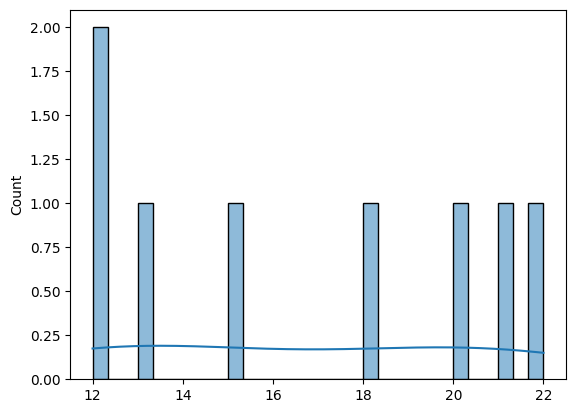

In [43]:
sns.histplot (data, bins=30, kde=True)

### PDF (probability dansity function)

In [ ]:
"how comun is this value?"
the PDF tells you th height of the bell curve at any point
Higher PDF value = more comon value
Lower PDF value = more rare

In the tips column : 
pdf(3.0) -> High value (tips arround 3$ are common)
pdf(10.0) -> Low value (tips around 10$ are rare)

In [46]:
tip_mean = np.mean(tip_amount)
tip_mean

np.float64(2.99827868852459)

In [47]:
tip_std = np.std(tip_amount)
tip_std

np.float64(1.3807999538298954)

In [51]:
tip_distribution =  scipy.stats.describe(tip_amount)

In [45]:
x =  np.linspace(0, 7, 1000)
x[:10]

array([0.        , 0.00700701, 0.01401401, 0.02102102, 0.02802803,
       0.03503504, 0.04204204, 0.04904905, 0.05605606, 0.06306306])

In [52]:
pdf_values = tip_distribution.pdf(x)
plt.plot(x)

AttributeError: 'DescribeResult' object has no attribute 'pdf'

In [53]:
tip_distribution.pdf(2.0) #close to mean, common


AttributeError: 'DescribeResult' object has no attribute 'pdf'

In [ ]:
tip_distribution.pdf(3.0) #near meann more common

In [ ]:
tip_distribution.pdf(0.5)

### CDF - Cumulative Distribution Fonction
what percentage or values are below this point?

for our tips array
cdf(3.0) -> if mean is 3.0 this returns  0.5=50% of tips are below 3$
cdf(5.0) -> Returns 0,95)=95% of tips are below 5%